### Deep Learning Homework 01 
<i>Name: Ruchi Sharma, EID: rs58898</i>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import torch

### Question 01:

In [3]:
#1.1

import torch

x=torch.tensor([4,2], dtype=torch.float, requires_grad=True)
w=torch.tensor([2,1],dtype=torch.float)
b=torch.tensor(3,dtype=torch.float)

y=torch.matmul(w.T,x) + b
y.backward()

x.grad

tensor([2., 1.])

In [4]:
#1.2

y_true=torch.tensor([0,1,1,0], dtype=torch.float)
y_pred=torch.tensor([0.1,0.95,1.10,0.2], dtype=torch.float)

def SqEr(y1, y2):
    ans,n=0.0,len(y1)
    for i in range(n):
        ans+=(y1[i].item()-y2[i].item())**2
    return ans/n

loss=torch.nn.MSELoss()
loss(y_true,y_pred), SqEr(y_true,y_pred)

(tensor(0.0156), 0.01562500186264533)

In [5]:
#1.3

x=torch.tensor([[0,0],[0,1],[1,0],[1,1]],dtype=torch.float)
w=torch.tensor([2,1],dtype=torch.float,requires_grad=True)
b=torch.tensor(3.0,requires_grad=True)

y_true=torch.tensor([0,1,1,0],dtype=torch.float)
y_pred=torch.sum(w*x,1)+b

def mseLoss(y_true,y_pred):
    loss=torch.mean((y_true-y_pred)**2)
    return loss
loss2=mseLoss(y_true,y_pred)
loss2

tensor(17.5000, grad_fn=<MeanBackward0>)

In [6]:
loss2.backward() 
w.grad, b.grad

(tensor([5.0000, 4.5000]), tensor(8.))

In [47]:
#extra credit

epochs, eta = 500, 0.1
x=torch.tensor([[0,0],[0,1],[1,0],[1,1]],dtype=torch.float)
w=torch.tensor([2,1],dtype=torch.float,requires_grad=True)
b=torch.tensor(3.0,requires_grad=True)

y_true=torch.tensor([0,1,1,0],dtype=torch.float)
lossn=[]

for i in range(epochs):

    y_pred=torch.sum(w*x,1)+b
    
    mseloss = torch.nn.MSELoss() 
    loss3=mseloss(y_true,y_pred)
    loss3.backward()
    
    with torch.no_grad():
        w-=w.grad*eta
        b-=b.grad*eta
        w.grad.zero_()
        b.grad.zero_()
    
    lossn.append(loss3.item())
    # print(f"Epoch {i}/{epochs}: Loss: {loss3}")

w, b

(tensor([1.2884e-07, 1.2975e-07], requires_grad=True),
 tensor(0.5000, requires_grad=True))

In [48]:
loss3

tensor(0.2500, grad_fn=<MseLossBackward0>)

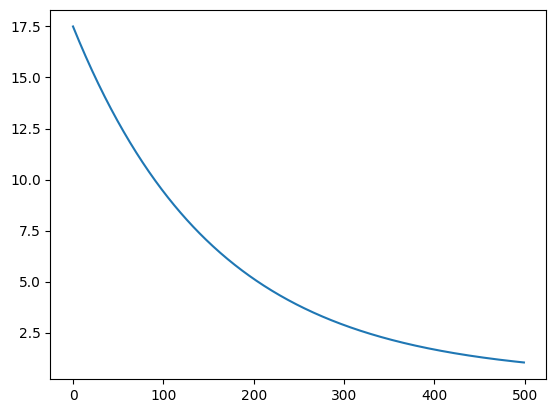

In [22]:
import matplotlib.pyplot as plt
plt.plot(lossn)

### Question 02:

In [3]:
#2.1

# Convert input and kernel to tensors
x = torch.tensor([1, -1, 3, 4, 4], dtype=torch.float)
kernel = torch.tensor([1, 1], dtype=torch.float)

# Reshape the input and kernel to add a batch dimension
x = x.unsqueeze(0)
kernel = kernel.unsqueeze(0).unsqueeze(0)

# Convolution with stride=1
conv = torch.nn.Conv1d(in_channels=1, out_channels=1, kernel_size=2, stride=1)
output = conv(x)
print(output.squeeze().tolist()) # [2, 2, 8, 8]

# Convolution with stride=2
conv = torch.nn.Conv1d(in_channels=1, out_channels=1, kernel_size=2, stride=2)
output = conv(x)
print(output.squeeze().tolist()) # [2, 8]

[-0.46470892429351807, 1.9181803464889526, 0.226027250289917, -0.28238964080810547]
[0.09991604089736938, 0.7974510192871094]


In [11]:
# 2.1

x1=torch.tensor([1, -1, 3, 4, 4],dtype=torch.float)
x1=x1.unsqueeze(0)
cnn1d1=torch.nn.Conv1d(in_channels=1,out_channels=1,kernel_size=2,bias=False)
cnn1d1.weight.data=torch.tensor([1,1],dtype=torch.float,requires_grad=True)
cnn1d1.weight.data=cnn1d1.weight.data.unsqueeze(0).unsqueeze(0)
out1=cnn1d1(x1)

out1

tensor([[0., 2., 7., 8.]], grad_fn=<SqueezeBackward1>)

In [12]:
x1=torch.tensor([1, -1, 3, 4, 4],dtype=torch.float)
x1=x1.unsqueeze(0)
cnn1d1=torch.nn.Conv1d(in_channels=1,out_channels=1,kernel_size=2,bias=False,stride=2)
cnn1d1.weight.data=torch.tensor([1,1],dtype=torch.float,requires_grad=True)
cnn1d1.weight.data=cnn1d1.weight.data.unsqueeze(0).unsqueeze(0)
out2=cnn1d1(x1)

out2

tensor([[0., 7.]], grad_fn=<SqueezeBackward1>)

In [40]:
#2.2 Part (i) & (ii)

# given grayscale image
image = torch.tensor([[0.1, -0.6, 0.4, 0.8],
                      [-0.4, 0.3, 0.9, 0.2],
                      [0.5, 0.2, 0.8, -0.7],
                      [0.3, 0.7, -0.4, 0.1]], dtype=torch.float)

# filters
filter1 = torch.tensor([[1, 0], [0, 1]], dtype=torch.float)
filter2 = torch.tensor([[0, 1], [1, 0]], dtype=torch.float)

# perform 2-d convolution with stride=1
output1 = torch.nn.functional.conv2d(image.unsqueeze(0).unsqueeze(0), filter1.unsqueeze(0).unsqueeze(0), stride=1)
output2 = torch.nn.functional.conv2d(image.unsqueeze(0).unsqueeze(0), filter2.unsqueeze(0).unsqueeze(0), stride=1)

print(output1.squeeze().size())
print(output2.squeeze().size())
print("The output is 2 channels when stride = 1 is of size 3x3.")

torch.Size([3, 3])
torch.Size([3, 3])


In [41]:
# perform 2-d convolution with stride=2
output1 = torch.nn.functional.conv2d(image.unsqueeze(0).unsqueeze(0), filter1.unsqueeze(0).unsqueeze(0), stride=2)
output2 = torch.nn.functional.conv2d(image.unsqueeze(0).unsqueeze(0), filter2.unsqueeze(0).unsqueeze(0), stride=2)

print(output1.squeeze().size())
print(output2.squeeze().size())
print("The output is 2 channels when stride = 1 is of size 2x2.")    

torch.Size([2, 2])
torch.Size([2, 2])
The output is 2 channels of size 2x2.


In [43]:
output1 = output1.reshape(-1)
output2 = output2.reshape(-1)
print(output1.squeeze().size())
print(output2.squeeze().size())

torch.Size([4])
torch.Size([4])


In [44]:
#2.2 Part (iv)

# Reshape the image to add a batch dimension
image = image.unsqueeze(0).unsqueeze(0)

# Max-pooling
pool = torch.nn.MaxPool2d(kernel_size=(2, 2), stride=1)
output = pool(image)

print("Output after Max-pooling:")
print(output.squeeze().tolist())

Output after Max-pooling:
[[0.30000001192092896, 0.8999999761581421, 0.8999999761581421], [0.5, 0.8999999761581421, 0.8999999761581421], [0.699999988079071, 0.800000011920929, 0.800000011920929]]


The main advantage of max-pooling over convolution is that it reduces the computational complexity of the network. Max-pooling also helps to reduce overfitting by reducing the size of the feature maps. However, a max-pooling operation may not be advantageous if the input features are small in size or if we need to preserve fine details in the features. In such cases, max-pooling can hurt the network by losing important information.